<a href="https://colab.research.google.com/github/derek-shing/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [0]:
# TODO - during class, but please help!

In [1]:
import random
# help(random.randint)
random.seed(10)
sample = [random.randint(0, 1) for _ in range(30)]
print(sample)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]


In [2]:
import pandas as pd
df = pd.DataFrame(sample)
df.describe()

,0
count,30.000000
mean,0.600000
std,0.498273
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


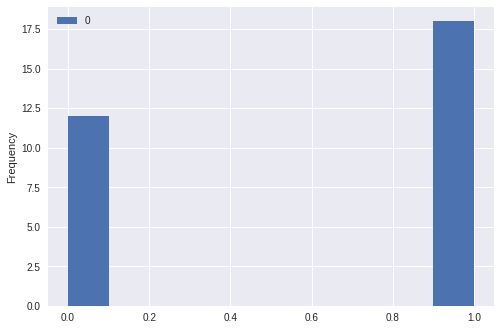

In [3]:
df.plot.hist();

In [5]:
# Now with confidence!

import scipy
# help(scipy.stats.ttest_1samp)
scipy.stats.ttest_1samp(df[0], 0.5)

Ttest_1sampResult(statistic=1.0992421631894096, pvalue=0.2807046476465548)

In [12]:
from math import sqrt
df[0].std() / sqrt(30)

0.09097176522946843

In [0]:
# Let's make a reusable function, and do it from scratch!
def std(sample, mean):
  std = 0
  for obs in sample:
    std += (obs - mean)**2
  return (std / (len(sample) - 1)) ** (1/2)

def calculate_t_stat(sample, null_hyp):
  sample_mean = sum(sample) / len(sample)
  sample_std = std(sample, sample_mean)
  return (sample_mean - null_hyp) / (sample_std / (len(sample) ** (1/2)))

In [15]:
# Let's test it
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

# Try this with both scipy and ours
scipy.stats.ttest_1samp(survey_data, 0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [16]:
calculate_t_stat(survey_data, 0.5)

2.364321853156195

In [24]:
t = scipy.stats.t(len(survey_data))
t.cdf(calculate_t_stat(survey_data, 0.5))

0.9890062713232346

In [0]:
help(scipy.stats.t)

In [27]:
(1-t.cdf(calculate_t_stat(survey_data, 0.5)))

0.010993728676765402

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [29]:
# TODO - your code here!
issue_df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
issue_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
issue_df.loc[:,1:16]=issue_df.loc[:,1:16].replace({'y':1,'n':0,'?':0})

In [51]:
issue_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
groups=issue_df.groupby(0)

In [41]:
groups

In [0]:
groups.get_group('republican')

In [0]:
re_df=groups.get_group('republican')
demo_df=groups.get_group('democrat')

In [54]:
re_df[1].mean()

0.18452380952380953

In [78]:
result=[]
for i in range(1,17):
  result = scipy.stats.ttest_1samp(re_df[i],demo_df[i].mean())
  if (result[0]>0) & (result[1]/2<0.01):
    print('republicans support more than democrats on issue',i,':',result)
  elif (result[0]<0) & (result[1]/2<0.01):
    print('domocrats support more than republicans on issue',i,':',result)
  elif (result[1]>0.1):
    print('there may not be much of a difference on issue',i)
    

domocrats support more than republicans on issue 1 : Ttest_1sampResult(statistic=-13.317121260144871, pvalue=4.891027447999919e-28)
there may not be much of a difference on issue 2
domocrats support more than republicans on issue 3 : Ttest_1sampResult(statistic=-28.12572247100878, pvalue=3.031504733934054e-65)
republicans support more than democrats on issue 4 : Ttest_1sampResult(statistic=69.79727829679148, pvalue=1.7810684325411888e-125)
republicans support more than democrats on issue 5 : Ttest_1sampResult(statistic=38.06006834125732, pvalue=3.273246292945219e-84)
republicans support more than democrats on issue 6 : Ttest_1sampResult(statistic=17.391707101285185, pvalue=2.5202449927838827e-39)
domocrats support more than republicans on issue 7 : Ttest_1sampResult(statistic=-15.82210919967936, pvalue=4.843932446213345e-35)
domocrats support more than republicans on issue 8 : Ttest_1sampResult(statistic=-24.876946898005766, pvalue=4.7479360802216706e-58)
domocrats support more than re